In [1227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### W--> Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work
##### R--> number of times a player crosses home plate
##### AB--> At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
##### H--> Hit: reaching base because of a batted, fair ball without error by the defense
##### 2B--> Double: hits on which the batter reaches second base safely without the contribution of a fielding error
##### 3B--> Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
##### HR--> Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
##### BB--> Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
##### SO--> Strikeout: number of batters who received strike three
##### SB--> Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
##### RA--> Run average: number of runs allowed times nine divided by innings pitched
##### ER--> Earned run: number of runs that did not occur as a result of errors or passed balls
##### ERA-->  Earned run average: total number of earned runs multiplied by 9, divided by innings pitched
##### CG-->  Complete game: number of games where player was the only pitcher for their team
##### SHO--> Shutout: number of complete games pitched with no runs allowed
##### SV--> Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
##### E--> Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a resul

In [1228]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [1229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [1230]:
print('Size of the data:''\n no.of colums',df.shape[1],'\n no of rows:',df.shape[0])

Size of the data:
 no.of colums 17 
 no of rows: 30


In [1231]:
#checkig null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

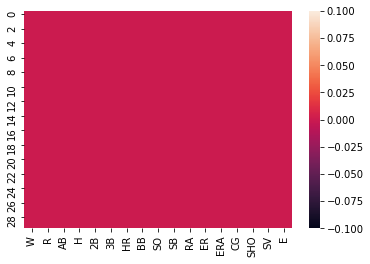

In [1232]:
sns.heatmap(df.isnull())

In [1233]:
#checking duplicate datas
df.duplicated().sum()

0

In [1234]:
numerical_features=[features for features in df.columns if df.dtypes[features] != 'O']

In [1235]:
print('no.of numerical features',len(numerical_features))

no.of numerical features 17


In [1236]:
descreate_features=[features for features in numerical_features if len(df[features].unique())<10]
descreate_features

['CG']

In [1237]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


from the describe table error,SO,SB column have some outliers

error column have mean > median so have right skew data

CG,SHO,SV,H have also positive skew data

2B,BB,SOR,RA,ER have left skew data

In [1238]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

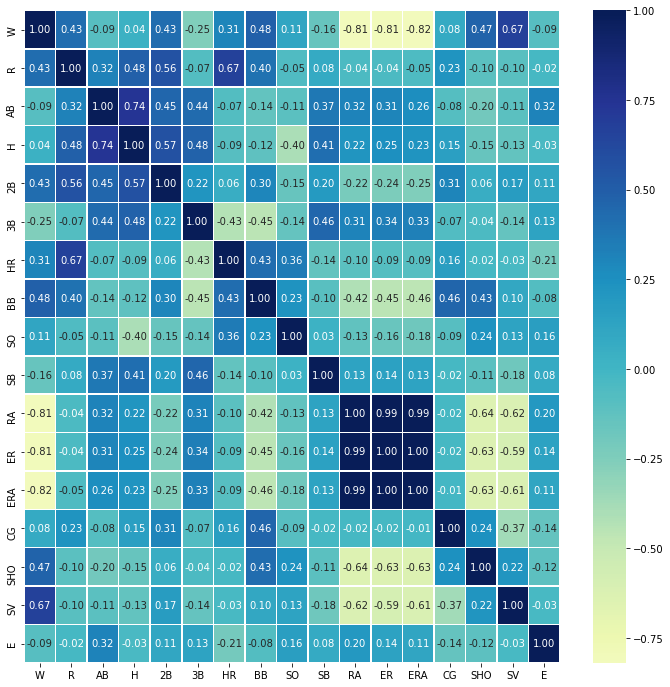

In [1239]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',center=0,fmt="0.2f",linewidths=0.5)

##### from the heatmap with the target column R,BB,SHO,SV are highly positive correlated 
##### RA,ER,ERA are highly negatively correlated with target
##### RA,ER,ERA are postively correlated with each others
##### AB and H are also positively correlated with each others
##### BB and HR are also positively correlated with each others
##### so from that RA,ER,ERA have multico-linearity we can use VIF OR PCA for that columns

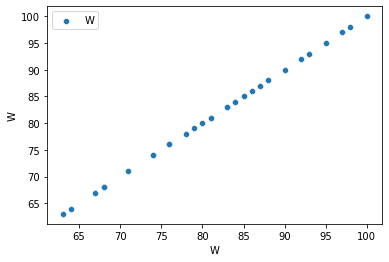

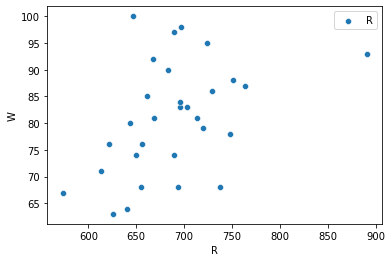

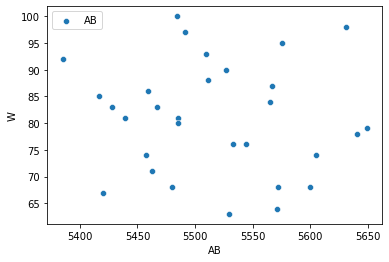

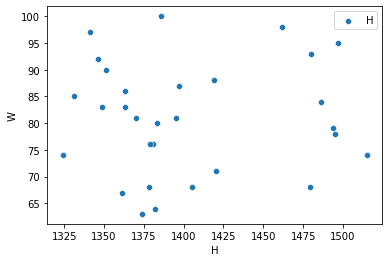

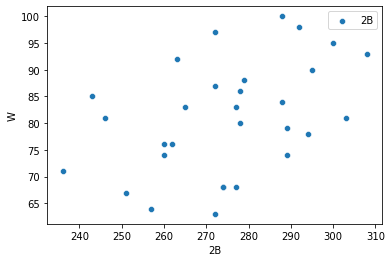

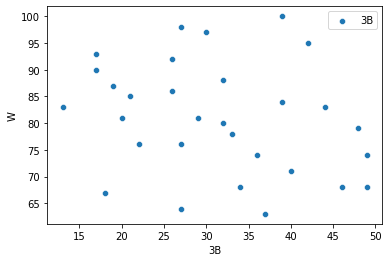

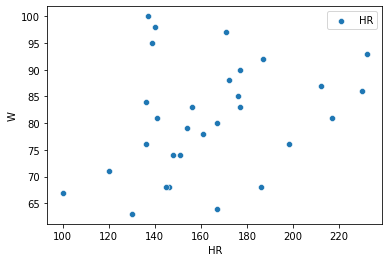

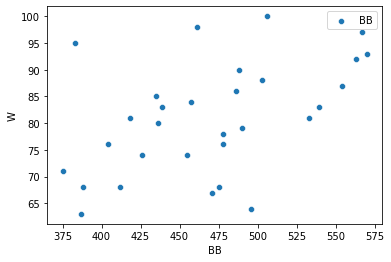

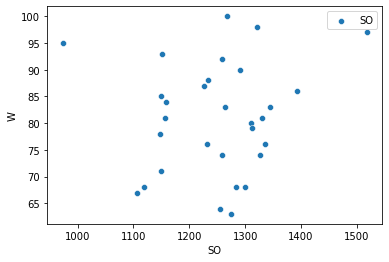

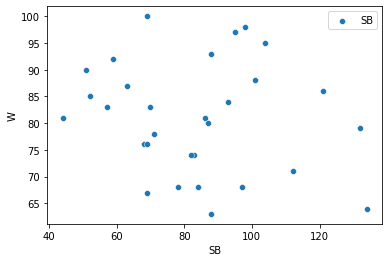

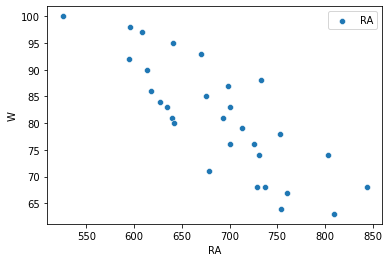

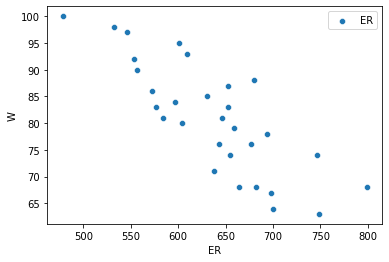

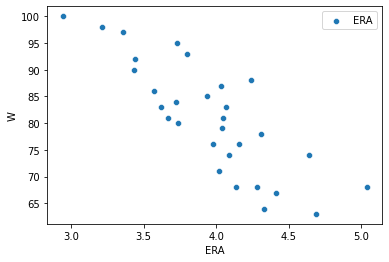

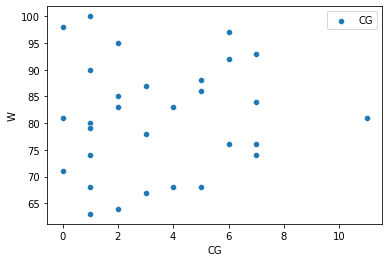

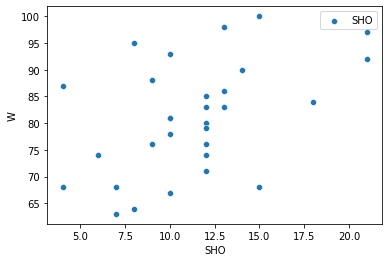

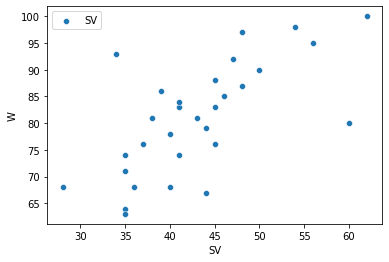

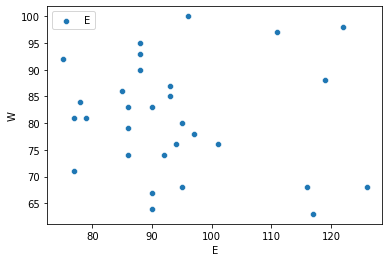

In [1240]:
# visualization
for i in df.columns:
    plt.plot()
    sns.scatterplot(df[i],df['W'],label=i)
    plt.legend()
    plt.show()
    

##### from the scatter plot we can say that 'R','2B','HR','BB','SV' ,'SHO' are linerly increasing with target columns
##### RA,ER,ERA are linearly dcreasing the taregt column with negative corelation
##### E,CG,SB,3B,H,AB have random scatter so nothing found related to W target so drop that columns

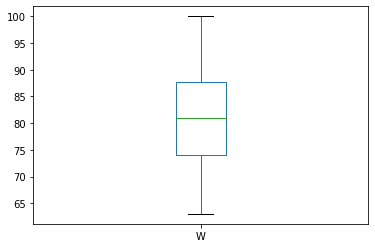

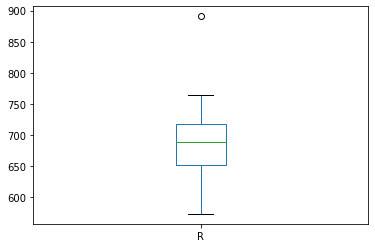

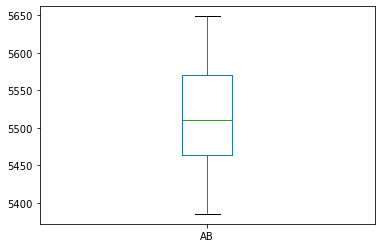

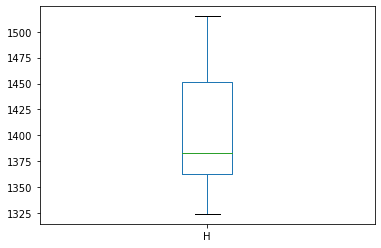

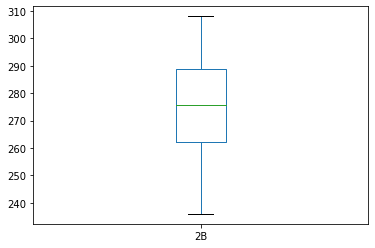

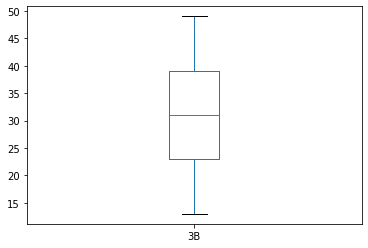

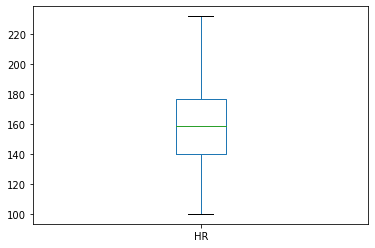

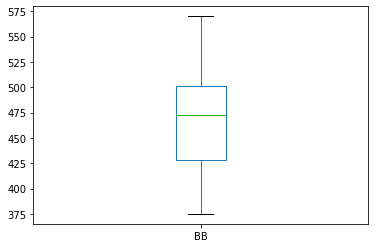

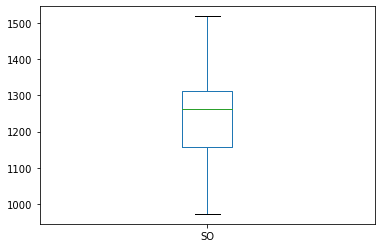

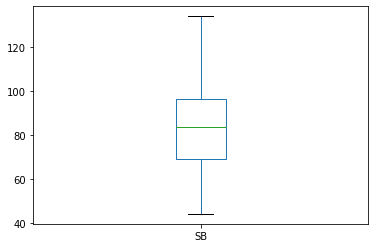

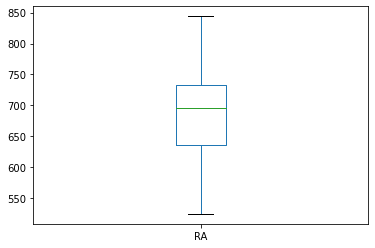

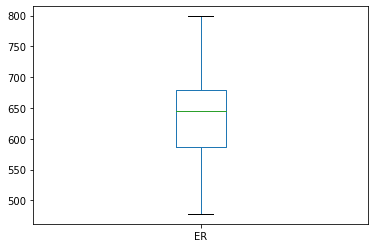

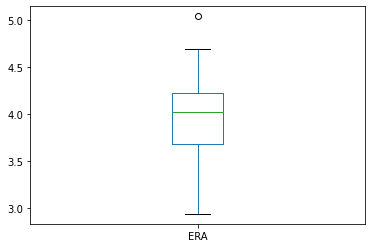

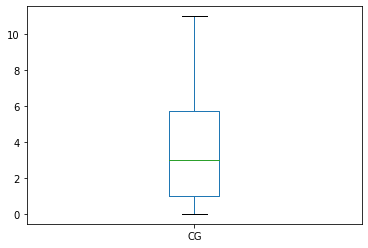

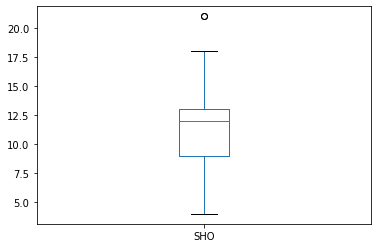

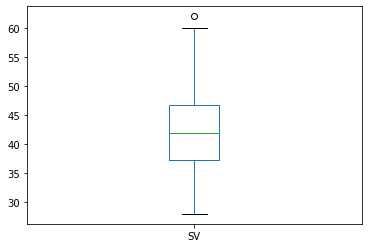

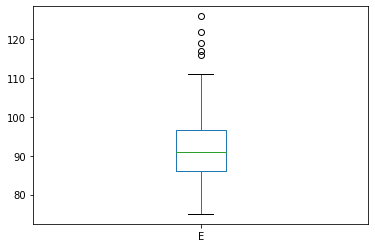

In [1241]:
for i in df.columns:
    plt.plot()
    df[i].plot(kind='box')
    plt.show()
    

##### from box plot in features like 'R','E','SV','SHO','ERA' have some outliers 

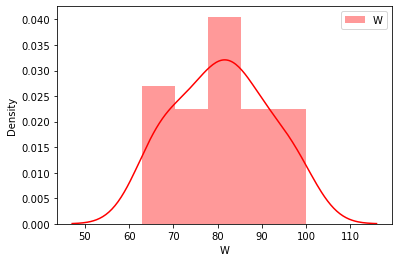

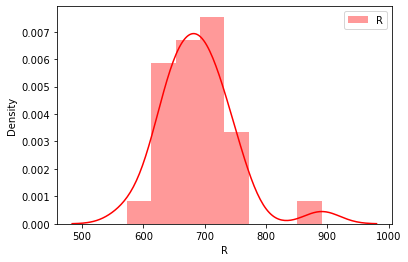

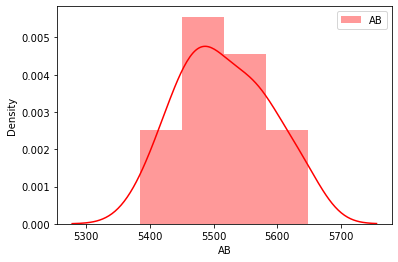

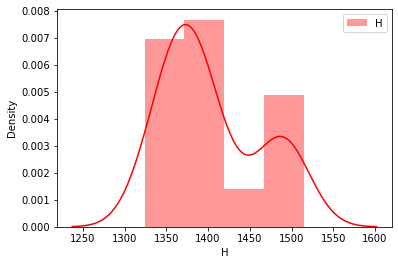

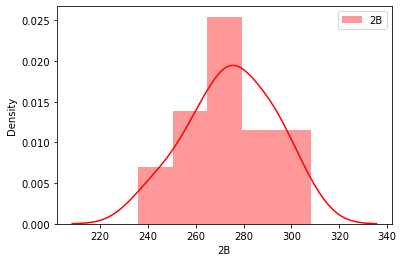

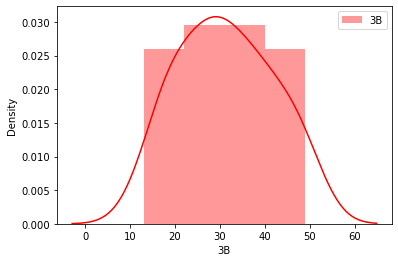

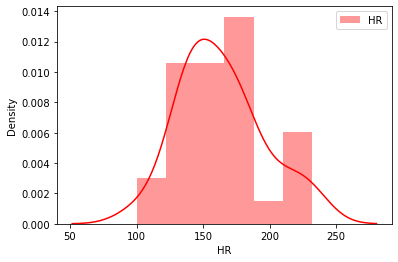

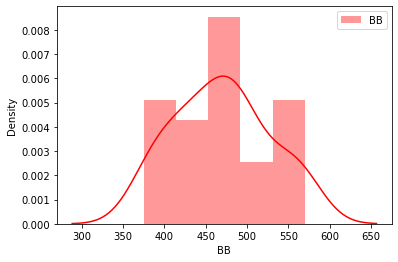

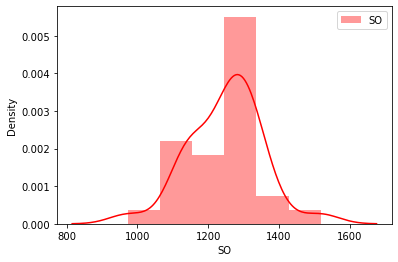

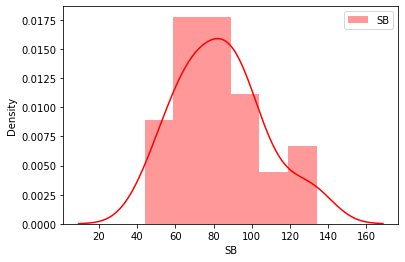

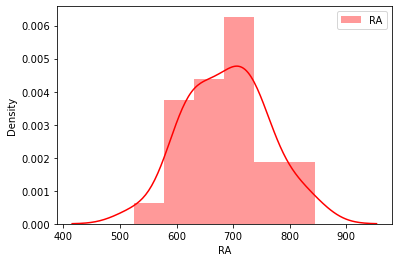

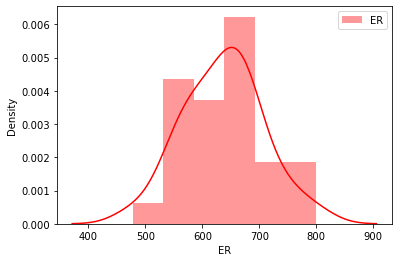

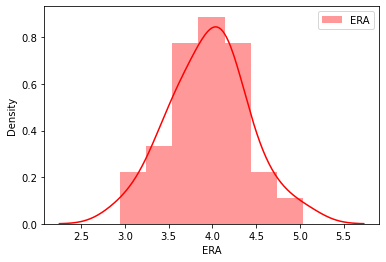

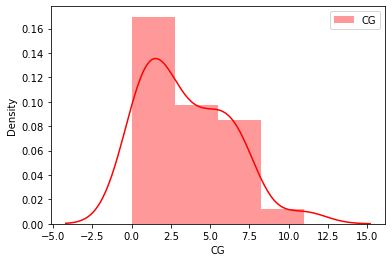

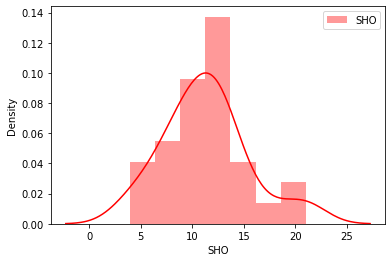

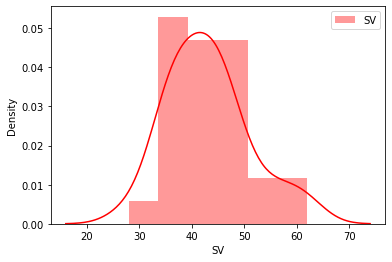

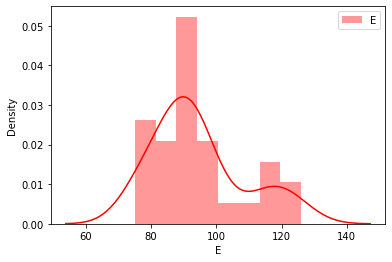

In [1242]:
for i in df.columns:
    plt.plot()
    sns.distplot(df[i],label=i,color='r')
    plt.legend()
    plt.show()

In [1243]:
df=df.drop(['CG','E','H','AB','SO','SB','3B'],axis=1)
df

,W,R,2B,HR,BB,RA,ER,ERA,SHO,SV
0,95,724,300,139,383,641,601,3.73,8,56
1,83,696,277,156,439,700,653,4.07,12,45
2,81,669,303,141,533,640,584,3.67,10,38
3,76,622,260,136,404,701,643,3.98,9,37
4,74,689,289,151,455,803,746,4.64,12,35
5,93,891,308,232,570,670,609,3.80,10,34
6,87,764,272,212,554,698,652,4.03,4,48
7,81,713,246,217,418,693,646,4.05,10,43
8,80,644,278,167,436,642,604,3.74,12,60
9,78,748,294,161,478,753,694,4.31,10,40


In [1244]:
from scipy.stats import zscore
from scipy import stats
z=np.abs(zscore(df))

In [1245]:
thresold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [1246]:
df_n.shape

(29, 10)

In [1247]:
print('Data loss:',((30-29)/30)*100)

Data loss: 3.3333333333333335


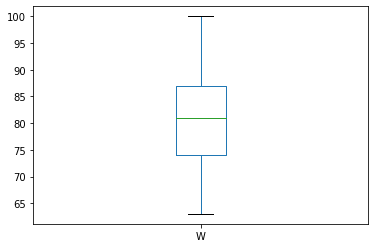

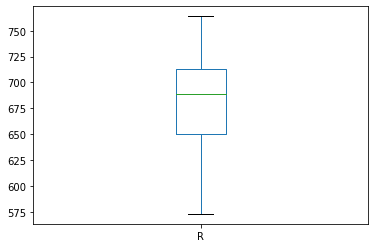

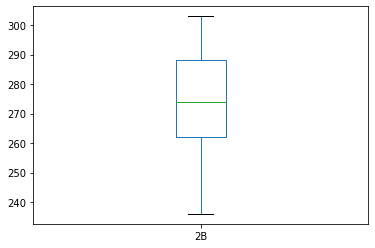

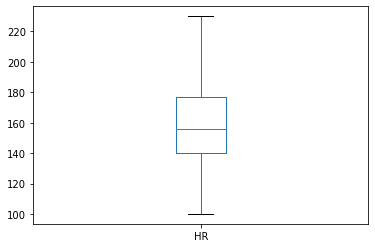

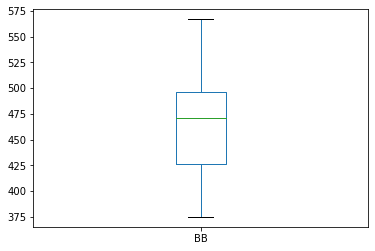

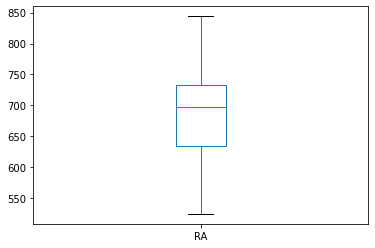

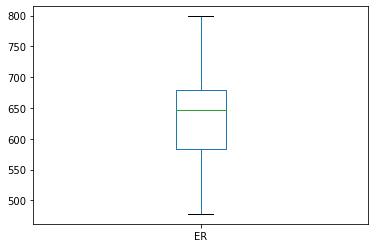

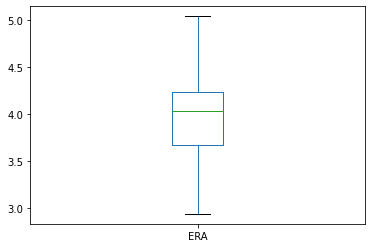

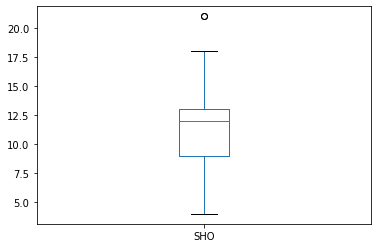

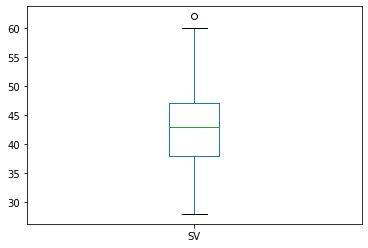

In [1248]:
for i in df_n.columns:
    plt.plot()
    df_n[i].plot(kind='box')
    plt.show()
    

In [1249]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df_n2 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df_n2.shape

(25, 10)

In [1250]:
print('Data loss:',((30-25)/30)*100)

Data loss: 16.666666666666664


##### more data loss in IQR so go with zscore method

In [1251]:
# check skewness
df_n.skew()

W      0.119013
R     -0.215364
2B    -0.335304
HR     0.450862
BB     0.151193
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
dtype: float64

In [1252]:
x=df_n.iloc[:,1:]
y=df_n.iloc[:,0]

In [1253]:
# remove skewness
for index in x.skew().index:
    if x.skew().loc[index] >0.50:
        x[index]=np.cbrt(x[index])
x.skew()

R     -0.215364
2B    -0.335304
HR     0.450862
BB     0.151193
RA     0.018155
ER     0.018461
ERA    0.016693
SHO   -0.298136
SV     0.280963
dtype: float64

In [1254]:
x.shape

(29, 9)

In [1255]:
# Scaling data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x1=pd.DataFrame(x1)

In [1256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def valcal():
    vif=pd.DataFrame()
    vif['vif factors']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    vif['features']=x.columns
    print(vif)

In [1257]:
valcal()

   vif factors features
0     2.988367        R
1     2.269050       2B
2     2.650637       HR
3     1.862292       BB
4    89.449604       RA
5   427.946966       ER
6   266.546758      ERA
7     2.329620      SHO
8     2.385712       SV


##### from vif score ERA related with ER because of run avg getting by run counting so drop ERA
##### ER are earn runs which include in RA so drop ER as well

In [1267]:
x2=x.drop(['ERA','ER'],axis=1)

In [1268]:
vif=pd.DataFrame()
vif['vif factors']=[variance_inflation_factor(x2.values,i) for i in range(x2.shape[1])]
vif['features']=x2.columns
print(vif)

   vif factors features
0   674.002805        R
1   543.740782       2B
2    78.833138       HR
3   117.191729       BB
4    73.602612       RA
5    82.719601      SHO
6   242.684133       SV


In [1269]:
x_n=sc.fit_transform(x2)

In [1270]:
# apply PCA
from sklearn.decomposition import PCA
pca=PCA()
for i in range(2,x_n.shape[1]+1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x_n)
    print(i,sum(pca.explained_variance_ratio_))

2 0.6005549846192916
3 0.7606635183844883
4 0.8824383970056036
5 0.9486968981280159
6 0.9760453414945277
7 0.9999999999999999


In [1271]:
pca = PCA(n_components=6)
x_3 = pca.fit_transform(x_n)

In [1299]:
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from mlxtend.regressor import StackingCVRegressor
lr=LinearRegression()

In [1281]:
lr=LinearRegression()
nsvr=NuSVR()
l1=Ridge()
rc=RidgeCV()
brd=BayesianRidge()
l1=Lasso()
l3=ElasticNet()
sgd=SGDRegressor()
svr=SVR()
svrl=LinearSVR()
kn=KNeighborsRegressor()
dtc=DecisionTreeRegressor() 
xg1=XGBRFRegressor()
xg2=XGBRegressor()

In [1277]:
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_3,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_tr=lr.predict(x_train)
    pred_te=lr.predict(x_test)
    if round(r2_score(y_train,pred_tr)*100,1)==round(r2_score(y_test,pred_te)*100,1):
        print('Random state',i)
        print('Train score',r2_score(y_train,pred_tr)*100)
        print('Test score',r2_score(y_test,pred_te)*100) 

Random state 204
Train score 85.74282733304115
Test score 85.67556166712134


In [1278]:
lr=LinearRegression(fit_intercept=True,normalize=False,positive=False)
x_train,x_test,y_train,y_test=train_test_split(x_3,y,test_size=0.30,random_state=204)
lr.fit(x_train,y_train)
print('Intercept:',lr.intercept_)
print('\nTrain score:',lr.score(x_train,y_train)*100)
pred=lr.predict(x_test)
print('R2_score: ',r2_score(y_test,pred)*100)
print('\nError1: ',mean_absolute_error(y_test,pred))
print('Error2 RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))

Intercept: 80.52134358930978

Train score: 85.74282733304115
R2_score:  85.67556166712134

Error1:  3.4920515800050733
Error2 RMSE:  4.2350456375469685


In [1279]:
def regul(f):
    f.fit(x_train,y_train)
    print(f,'\n\t',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('R2_score :',r2_score(y_test,pred)*100)
    print('error1:\n:',mean_absolute_error(y_test,pred))
    print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred)))

In [1282]:
regul(l1)

Lasso() 
	 79.11427526562285
R2_score : 87.67912769396908
error1:
: 3.130421820435858
RSME:
: 3.92771549420625


In [1283]:
regul(l2)

Ridge() 
	 85.5173504990859
R2_score : 88.02120547154709
error1:
: 3.1700723106440276
RSME:
: 3.8728069717506792


In [1284]:
regul(l3)

ElasticNet() 
	 76.47851245336943
R2_score : 83.42634944982106
error1:
: 3.5195550055758766
RSME:
: 4.55541956273866


In [1285]:
regul(rc)

RidgeCV(alphas=array([ 0.1,  1. , 10. ])) 
	 85.51735049908582
R2_score : 88.02120547154718
error1:
: 3.170072310644037
RSME:
: 3.8728069717506672


In [1286]:
regul(brd)

BayesianRidge() 
	 84.93556455926455
R2_score : 89.22028577439174
error1:
: 3.157355230847637
RSME:
: 3.673862663953966


In [1287]:
def regressor(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('error1:\n',mean_absolute_error(y_test,pred))
    print('RSME:\n',np.sqrt(mean_squared_error(y_test,pred)))
    print('r2 score:\n',r2_score(y_test,pred)*100)

In [1288]:
regressor(nsvr)

NuSVR() 
 24.281525969956654
error1:
 8.49807215134069
RSME:
 10.304019242775858
r2 score:
 15.204123279480308


In [1289]:
regressor(svrl)

LinearSVR() 
 -3922.698135385538
error1:
 60.39085027127391
RSME:
 61.10733376411738
r2 score:
 -2882.2777107128613


In [1290]:
regressor(svr)

SVR() 
 27.122021637101547
error1:
 8.253824153133785
RSME:
 10.141073676937436
r2 score:
 17.864805748304637


In [1291]:
regressor(sgd)

SGDRegressor() 
 85.69615921194242
error1:
 3.4080645897838804
RSME:
 4.1534196289637935
r2 score:
 86.22241704047327


In [1292]:
regressor(kn)

KNeighborsRegressor() 
 62.99592536993354
error1:
 5.311111111111109
RSME:
 6.371812928829594
r2 score:
 67.57444291066854


In [1293]:
regressor(dtc)

DecisionTreeRegressor() 
 100.0
error1:
 5.555555555555555
RSME:
 6.324555320336759
r2 score:
 68.053638335634


In [1294]:
regressor(xg1)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) 
 97.79144122069535
error1:
 4.906113518608941
RSME:
 5.715977855631026
r2 score:
 73.90589005589425


In [1295]:
regressor(xg2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
 99.99999955928574
error1:
 4.691184997558594
RSME:
 5.5844794797804465
r2 score:
 75.09269083152041


In [1302]:
parameters={"n_iter":range(1,300),'compute_score':[True, False],'fit_intercept':[True, False]}
clf = GridSearchCV(BayesianRidge(), parameters, cv=5,scoring="r2")
clf.fit(x_3,y)
clf.best_params_

{'compute_score': True, 'fit_intercept': True, 'n_iter': 1}

In [1304]:
parameters={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'positive':[True,False]}
clf = GridSearchCV(LinearRegression(), parameters, cv=5,scoring="r2")
clf.fit(x_3,y)
clf.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}

In [1297]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = GridSearchCV(XGBRFRegressor(), parameters, cv=5,scoring="r2")
clf.fit(x_3,y)
clf.best_params_

{'max_depth': 7, 'n_estimators': 51, 'reg_lambda': 0.2}

In [1353]:
X_train, X_test, y_train, y_test = train_test_split(x_3, y, random_state=204, test_size=0.30)
stack = StackingCVRegressor(regressors=(BayesianRidge(compute_score=True,fit_intercept=True,n_iter=1), 
                                        LinearRegression(copy_X=True,fit_intercept=True,normalize=False,positive=False),
                                        XGBRFRegressor(max_depth=7,n_estimators=51,reg_lambda=0.2)
                                       ),
                            meta_regressor=BayesianRidge(compute_score=True,fit_intercept=True,n_iter=1), 
                            cv=19,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(x_train, y_train)
pred = stack.predict(x_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(x_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.8841118649906095
r2 score train 0.8369587869336905


In [1340]:
y_pred=stack.predict(x_test)
score=r2_score(y_test,y_pred)
print('R2 score is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.8841118649906095
mean absolute error: 3.1818179177440475
mean squared error: 14.510339077348627
root mean square error: 3.809243898380442


In [1341]:
scores = cross_val_score(StackingCVRegressor(regressors=(BayesianRidge(compute_score=True,fit_intercept=True,n_iter=1), 
                                        LinearRegression(copy_X=True,fit_intercept=True,normalize=False,positive=False),
                                        XGBRFRegressor(max_depth=7,n_estimators=51,reg_lambda=0.2)
                                       ),
                            meta_regressor=BayesianRidge(compute_score=True,fit_intercept=True,n_iter=1), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False),x_3,y,cv=2)
print('cross val score',scores.mean())
print('std err',scores.std())

cross val score 0.466062660417453
std err 0.06347878933016043


In [1342]:
y_pred=stack.predict(x_3)
data=x2
data['WPred']=[round(i) for i in y_pred]
data['W']=y
data['differnce']=data['W']-data['WPred']
data

,R,2B,HR,BB,RA,SHO,SV,WPred,W,differnce
0,724,300,139,383,641,2.000000,3.825862,90,95,5
1,696,277,156,439,700,2.289428,3.556893,81,83,2
2,669,303,141,533,640,2.154435,3.361975,83,81,-2
3,622,260,136,404,701,2.080084,3.332222,73,76,3
4,689,289,151,455,803,2.289428,3.271066,72,74,2
6,764,272,212,554,698,1.587401,3.634241,86,87,1
7,713,246,217,418,693,2.154435,3.503398,82,81,-1
8,644,278,167,436,642,2.289428,3.914868,89,80,-9
9,748,294,161,478,753,2.154435,3.419952,79,78,-1
10,751,279,172,503,733,2.080084,3.556893,82,88,6


#### Regression graph

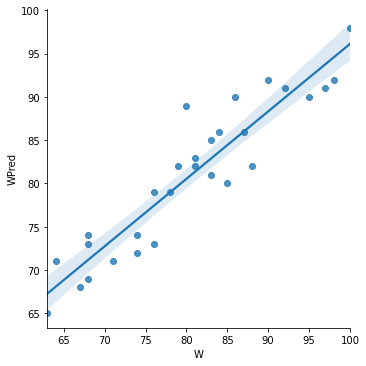

In [1343]:
sns.lmplot(x='W',y='WPred',data=data,palette='rainbow')

<AxesSubplot:xlabel='WPred', ylabel='Density'>

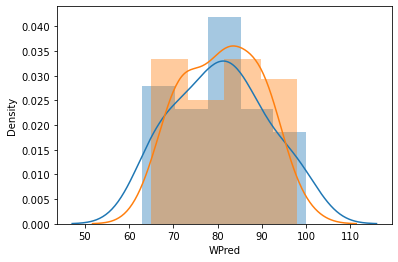

In [1344]:
sns.distplot(data['W'])
sns.distplot(data['WPred'])

### model have accuracy about 88% to 84% model combination of Bayesian,Linear and XGBRF regressors

In [1345]:
import joblib
joblib.dump(stack,'baseball.obj')
baseball=joblib.load('baseball.obj')